In [1]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import skimage
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout

In [2]:
data_train = pd.read_csv("fashion_mnist/fashion-mnist_train.csv")
data_test = pd.read_csv("fashion_mnist/fashion-mnist_test.csv")

In [3]:
x_train = data_train.iloc[:,1:]
x_test = data_test.iloc[:,1:]

y_train = data_train.iloc[:,:1]
y_test = data_test.iloc[:,:1]

In [4]:
x_train = x_train.values.reshape(-1, 28, 28, 1) / 255
x_test = x_test.values.reshape(-1, 28, 28, 1) / 255
y_train = y_train.values.astype('int')
y_test = y_test.values.astype('int')

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
def identity_block(x, num_filter):
    x_shortcut = x
    
    x = layers.Conv2D(num_filter, (1, 1))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(num_filter, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(num_filter * 4, (1, 1))(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Add()([x, x_shortcut])
    x = layers.Activation('relu')(x)
    return x

In [7]:
def conv_block(x, num_filter, strides=2):
    x_shortcut = x
    
    x = layers.Conv2D(num_filter, (1, 1), strides=strides)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(num_filter, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    
    x = layers.Conv2D(num_filter * 4, (1, 1))(x)
    x = layers.BatchNormalization()(x)
    
    x_shortcut = layers.Conv2D(num_filter * 4, (1, 1), strides=strides)(x_shortcut)
    x_shortcut = layers.BatchNormalization()(x_shortcut)
    x = layers.Add()([x, x_shortcut])
    x = layers.Activation('relu')(x)
    return x

In [9]:
def ResNet50(input_shape=(224, 224, 3), classes=1000):
    input_tensor = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(64, (7, 7), strides=2, padding='same')(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=2)(x)
    
    x = conv_block(x, 64, strides=1)
    for _ in range(2):
        x = identity_block(x, 64)
    
    x = conv_block(x, 128)
    for _ in range(3):
        x = identity_block(x, 128)
    
    x = conv_block(x, 256)
    for _ in range(5):
        x = identity_block(x, 256)

    x = conv_block(x, 512)
    for _ in range(2):
        x = identity_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(classes, activation='softmax')(x)
    model = models.Model(inputs=input_tensor, outputs=x, name='ResNet50')
    return model

In [10]:
model = ResNet50(input_shape=(28, 28, 1), classes=10)
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 64)   3200        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 14, 14, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 14, 14, 64)   0           ['batch_normalization[0][0

 batch_normalization_10 (BatchN  (None, 6, 6, 256)   1024        ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_2 (Add)                    (None, 6, 6, 256)    0           ['batch_normalization_10[0][0]', 
                                                                  'activation_6[0][0]']           
                                                                                                  
 activation_9 (Activation)      (None, 6, 6, 256)    0           ['add_2[0][0]']                  
                                                                                                  
 conv2d_11 (Conv2D)             (None, 3, 3, 128)    32896       ['activation_9[0][0]']           
                                                                                                  
 batch_nor

 activation_18 (Activation)     (None, 3, 3, 512)    0           ['add_5[0][0]']                  
                                                                                                  
 conv2d_21 (Conv2D)             (None, 3, 3, 128)    65664       ['activation_18[0][0]']          
                                                                                                  
 batch_normalization_21 (BatchN  (None, 3, 3, 128)   512         ['conv2d_21[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 3, 3, 128)    0           ['batch_normalization_21[0][0]'] 
                                                                                                  
 conv2d_22 (Conv2D)             (None, 3, 3, 128)    147584      ['activation_19[0][0]']          
          

                                                                                                  
 activation_28 (Activation)     (None, 2, 2, 256)    0           ['batch_normalization_31[0][0]'] 
                                                                                                  
 conv2d_32 (Conv2D)             (None, 2, 2, 256)    590080      ['activation_28[0][0]']          
                                                                                                  
 batch_normalization_32 (BatchN  (None, 2, 2, 256)   1024        ['conv2d_32[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_29 (Activation)     (None, 2, 2, 256)    0           ['batch_normalization_32[0][0]'] 
                                                                                                  
 conv2d_33

                                                                                                  
 batch_normalization_42 (BatchN  (None, 2, 2, 1024)  4096        ['conv2d_42[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_12 (Add)                   (None, 2, 2, 1024)   0           ['batch_normalization_42[0][0]', 
                                                                  'activation_36[0][0]']          
                                                                                                  
 activation_39 (Activation)     (None, 2, 2, 1024)   0           ['add_12[0][0]']                 
                                                                                                  
 conv2d_43 (Conv2D)             (None, 1, 1, 512)    524800      ['activation_39[0][0]']          
          

                                                                                                  
 activation_48 (Activation)     (None, 1, 1, 2048)   0           ['add_15[0][0]']                 
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['activation_48[0][0]']          
 alAveragePooling2D)                                                                              
                                                                                                  
 dense (Dense)                  (None, 10)           20490       ['global_average_pooling2d[0][0]'
                                                                 ]                                
                                                                                                  
Total params: 23,601,930
Trainable params: 23,548,810
Non-trainable params: 53,120
__________________________

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs = 4, batch_size = 128, validation_split = 0.2)
model.save_weights('resnet_weights_v2')

Epoch 1/4
375/375 [==============================] - 2810s 7s/step - loss: 0.6966 - accuracy: 0.7744 - val_loss: 1.1667 - val_accuracy: 0.5577
Epoch 2/4
375/375 [==============================] - 2790s 7s/step - loss: 0.4068 - accuracy: 0.8554 - val_loss: 2.6605 - val_accuracy: 0.4100
Epoch 3/4
375/375 [==============================] - 2795s 7s/step - loss: 0.5046 - accuracy: 0.8295 - val_loss: 1.0429 - val_accuracy: 0.6948
Epoch 4/4
375/375 [==============================] - 2789s 7s/step - loss: 0.4508 - accuracy: 0.8419 - val_loss: 0.5148 - val_accuracy: 0.8017


In [12]:
model.load_weights('resnet_weights_v2')

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 24s 70ms/step - loss: 0.5009 - accuracy: 0.8050


[0.5009128451347351, 0.8050000071525574]

In [14]:
from keras.layers import concatenate
img_a_in = Input(shape = x_train.shape[1:], name = 'ImageA_Input')
img_b_in = Input(shape = x_train.shape[1:], name = 'ImageB_Input')

img_a_feat = model(img_a_in)
img_b_feat = model(img_b_in)

combined_features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
combined_features = Dense(16, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(4, activation = 'linear')(combined_features)
combined_features = BatchNormalization()(combined_features)
combined_features = Activation('relu')(combined_features)
combined_features = Dense(1, activation = 'sigmoid')(combined_features)

In [15]:
similarity_model = Model(inputs = [img_a_feat, img_b_feat], outputs = [combined_features], name = 'Similarity_Model')
similarity_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['mae'])
similarity_model.summary()

Model: "Similarity_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 merge_features (Concatenate)   (None, 20)           0           ['input_2[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 16)           336         ['merge_features[1

In [16]:
train_groups = [x_train[np.where(y_train==i)[0]] for i in np.unique(y_train)]
test_groups = [x_test[np.where(y_test==i)[0]] for i in np.unique(y_train)]
print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])

train groups: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
test groups: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [17]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0] * batch_halfsize

        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]

    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

In [18]:
def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = similarity_model.predict([model.predict(pv_a), model.predict(pv_b)])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title('Image A\n Actual: %3.0f%%' % (100*c_d))
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title('Image B\n Predicted: %3.0f%%' % (100*p_d))
        ax2.axis('off')
    return fig

1/1 [==============================] - 0s 85ms/step


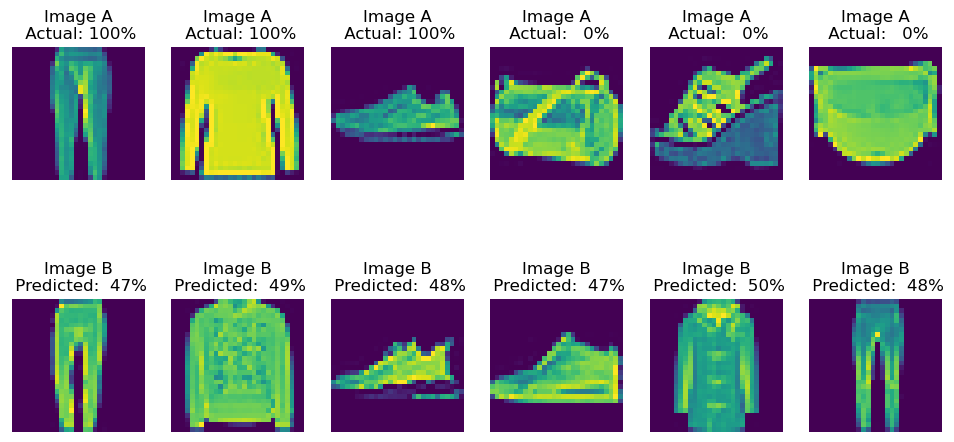

In [19]:
_ = show_model_output()

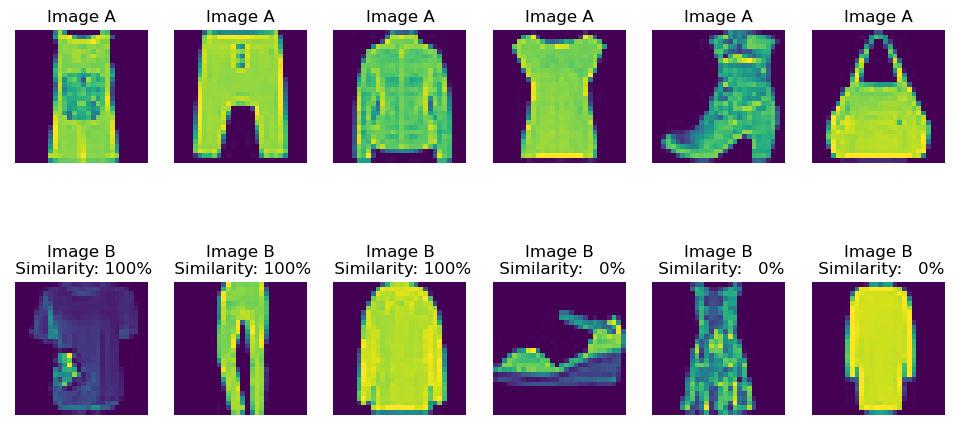

In [20]:
pv_a, pv_b, pv_sim = gen_random_batch(train_groups, 3)
fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
for c_a, c_b, c_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, m_axs.T):
    ax1.imshow(c_a[:,:,0])
    ax1.set_title('Image A')
    ax1.axis('off')
    ax2.imshow(c_b[:,:,0])
    ax2.set_title('Image B\n Similarity: %3.0f%%' % (100*c_d))
    ax2.axis('off')

In [21]:
def siam_gen(in_groups, batch_size = 32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(in_groups, batch_size // 2)
        yield [model.predict(pv_a), model.predict(pv_b)], pv_sim
        
valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = similarity_model.fit(
    siam_gen(train_groups),
    steps_per_epoch = 500,
    validation_data=([model.predict(valid_a), model.predict(valid_b)],
    valid_sim),
    epochs = 5,
    verbose = True)

1/1 [==============================] - 0s 85ms/step
Epoch 1/5
1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 95ms/step


500/500 [==============================] - 135s 268ms/step - loss: 0.5132 - mae: 0.3772 - val_loss: 0.3516 - val_mae: 0.2592
Epoch 2/5
1/1 [==============================] - 0s 73ms/step9 - loss: 0.3552 - mae: 0.25


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 76ms/step - loss: 0.3059 - mae: 0.21


1/1 [==============================] - 0s 84ms/step


500/500 [==============================] - 140s 280ms/step - loss: 0.2838 - mae: 0.1987 - val_loss: 0.2328 - val_mae: 0.1515
Epoch 3/5
1/1 [==============================] - 0s 80ms/step3 - loss: 0.2297 - mae: 0.15


1/1 [==============================] - 0s 87ms/step8 - loss: 0.2218 - mae: 0.14


1/1 [==============================] - 0s 99ms/step - loss: 0.2183 - mae: 0.14


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 101ms/step
Epoch 4/5
1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 94ms/step - loss: 0.2038 - mae: 0.12


1/1 [==============================] - 0s 99ms/step- loss: 0.2078 - mae: 0.12


1/1 [==============================] - 0s 193ms/step
Epoch 5/5
1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 109ms/step- loss: 0.2182 - mae: 0.13


1/1 [==============================] - 0s 116ms/step- loss: 0.2125 - mae: 0.12


1/1 [==============================] - 0s 127ms/step


In [22]:
similarity_model.save_weights('similarity_weights.h5')

1/1 [==============================] - 0s 22ms/step


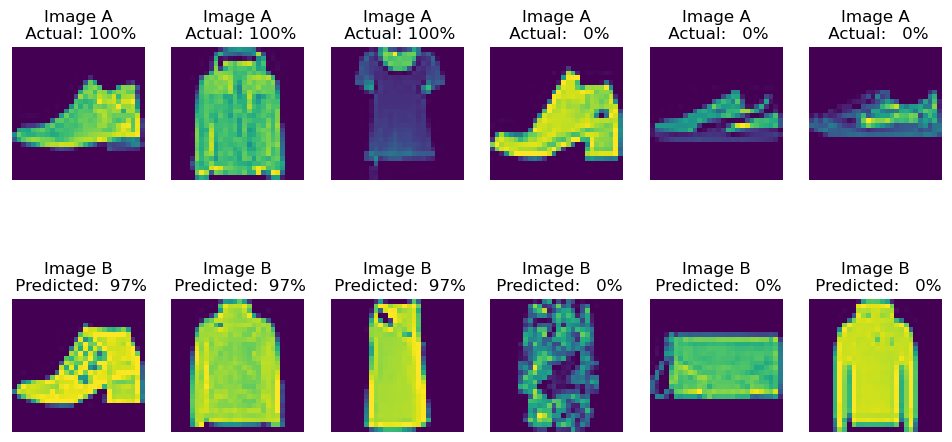

In [23]:
_ = show_model_output()

In [24]:
from sklearn.manifold import TSNE
x_test_features = model.predict(x_test, verbose = True, batch_size=128)

tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=2)
tsne_features = tsne_obj.fit_transform(x_test_features)

79/79 [==============================] - 19s 244ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.015s...


C:\Users\maksym\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 0.678s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.347s


C:\Users\maksym\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 74.8826828, gradient norm = 0.0089167 (50 iterations in 3.437s)
[t-SNE] Iteration 100: error = 68.9101639, gradient norm = 0.0038657 (50 iterations in 2.898s)
[t-SNE] Iteration 150: error = 66.0178909, gradient norm = 0.0027102 (50 iterations in 3.310s)
[t-SNE] Iteration 200: error = 64.2580414, gradient norm = 0.0021129 (50 iterations in 2.824s)
[t-SNE] Iteration 250: error = 63.0758362, gradient norm = 0.0017821 (50 iterations in 3.264s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.075836
[t-SNE] Iteration 300: error = 2.0853004, gradient norm = 0.0012717 (50 iterations in 3.158s)
[t-SNE] Iteration 350: error = 1.5114560, gradient norm = 0.0006396 (50 iterations in 3.608s)
[t-SNE] Iteration 400: error = 1.2019429, gradient norm = 0.0003891 (50 iterations in 2.742s)
[t-SNE] Iteration 450: error = 1.0192853, gradient norm = 0.0002656 (50 iterations in 3.589s)
[t-SNE] Iteration 500: error = 0.9012207, gradient norm = 0.0001962 (50 

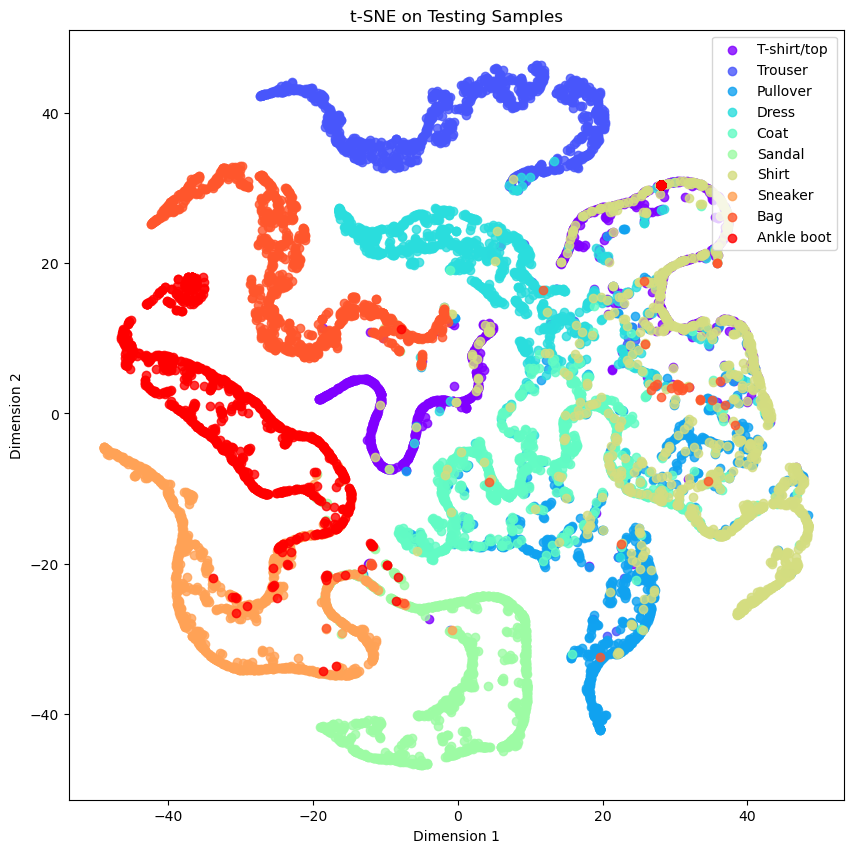

In [26]:
obj_categories = ['T-shirt/top','Trouser','Pullover','Dress',
                    'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(tsne_features[np.where(y_test == c_group), 0],
        tsne_features[np.where(y_test == c_group), 1],
        marker='o',
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes-dist.png')
plt.show(block=False)